## Computing VaR and CVaR from Simulation Modeling

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

Initial capital

In [2]:
v0 = 1000

Number of scenarios

In [3]:
N = 5000

Generate Normal random variables

In [4]:
r_speriod3 = np.random.normal(0.0879, 0.1465, (N, 3))

Distribution of value at the end of year 3

In [5]:
v3 = v0 * np.prod(1 + r_speriod3, 1)

Distribution of return over 3 years

In [6]:
r3 = np.prod(1+r_speriod3, 1) - 1

Losses (value and return)

In [7]:
loss_v3 = np.sort(-(v3 - v0))
loss_r3 = np.sort(-r3)

Quantile levels (90%, 95%, 99%, 99.9%)

In [8]:
alphas = [0.90, 0.95, 0.99, 0.999]

Compute VaR and CVaR

In [9]:
VaRv = []
VaRr = []
CVaRv = []
CVaRr = []
print ('Loss in value after 3 years:')
for q in range(len(alphas)):
    alf = alphas[q]
    VaRv.append(loss_v3[int(math.ceil(N * alf)) - 1])
    VaRr.append(loss_r3[int(math.ceil(N * alf)) - 1])
    CVaRv.append((1 / (N * (1 - alf))) * ((math.ceil(N * alf) - N * alf) * VaRv[q] + sum(loss_v3[int(math.ceil(N * alf)):])))
    CVaRr.append((1 / (N * (1 - alf))) * ((math.ceil(N * alf) - N * alf) * VaRr[q] + sum(loss_r3[int(math.ceil(N * alf)):])))
    print ('VaR %4.1f%% = $%6.2f, CVaR %4.1f%% = $%6.2f' % (100 * alf, VaRv[q], 100 * alf, CVaRv[q]))

print ('\nLoss return over 3 years:')
for q in range(len(alphas)):
    print ('VaR %4.1f%% = %6.2f%%, CVaR %4.1f%% = %6.2f%%' % (100 * alphas[q], 100 * VaRr[q], 100 * alphas[q], 100 * CVaRr[q]))

Loss in value after 3 years:
VaR 90.0% = $ 83.64, CVaR 90.0% = $186.21
VaR 95.0% = $161.56, CVaR 95.0% = $254.50
VaR 99.0% = $321.04, CVaR 99.0% = $381.12
VaR 99.9% = $449.36, CVaR 99.9% = $473.64

Loss return over 3 years:
VaR 90.0% =   8.36%, CVaR 90.0% =  18.62%
VaR 95.0% =  16.16%, CVaR 95.0% =  25.45%
VaR 99.0% =  32.10%, CVaR 99.0% =  38.11%
VaR 99.9% =  44.94%, CVaR 99.9% =  47.36%


Plot a histogram of the distribution of losses in value after 3 years

Text(0, 0.5, 'Frequency')

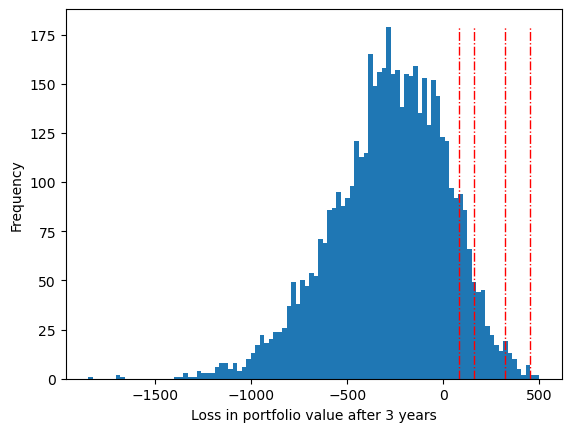

In [10]:
frequencyCounts, binLocations, patches = plt.hist(loss_v3, 100)
for q in range(len(alphas)):
    plt.plot([VaRv[q], VaRv[q]], [0, max(frequencyCounts)], color='r', linewidth=1, linestyle='-.')
plt.xlabel('Loss in portfolio value after 3 years')
plt.ylabel('Frequency')